In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1) (1).json': b'{"username":"anishdas8788","key":"89cbd74e61ae35e430c8da462b5241a5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the Dataset
!kaggle datasets download -d ciplab/real-and-fake-face-detection
!unzip real-and-fake-face-detection.zip

Dataset URL: https://www.kaggle.com/datasets/ciplab/real-and-fake-face-detection
License(s): CC-BY-NC-SA-4.0
 97% 417M/431M [00:04<00:00, 94.7MB/s]
100% 431M/431M [00:04<00:00, 95.9MB/s]
Archive:  real-and-fake-face-detection.zip
  inflating: real_and_fake_face/training_fake/easy_100_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_101_0010.jpg  
  inflating: real_and_fake_face/training_fake/easy_102_0101.jpg  
  inflating: real_and_fake_face/training_fake/easy_103_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_104_1000.jpg  
  inflating: real_and_fake_face/training_fake/easy_105_1100.jpg  
  inflating: real_and_fake_face/training_fake/easy_106_0011.jpg  
  inflating: real_and_fake_face/training_fake/easy_107_1011.jpg  
  inflating: real_and_fake_face/training_fake/easy_108_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_109_1111.jpg  
  inflating: real_and_fake_face/training_fake/easy_10_0001.jpg  
  inflating: real_and_fake_face/training_fake

Number of real images: 1081
Number of fake images: 960


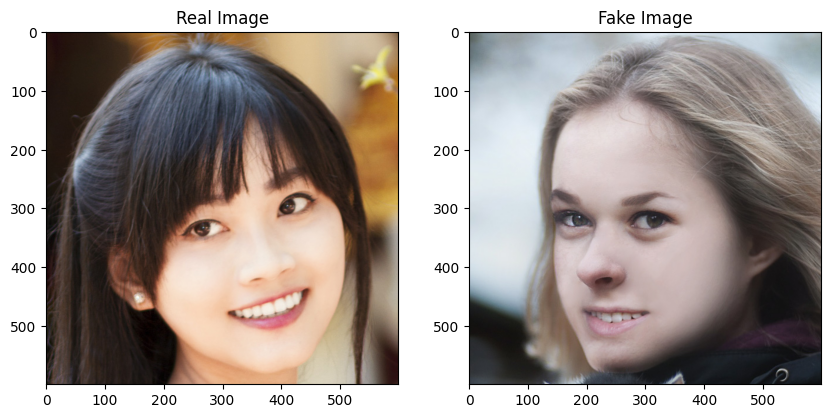

In [ ]:
# Load the Dataset
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


real_images_path = "real_and_fake_face/training_real/"
fake_images_path = "real_and_fake_face/training_fake/"


real_images = os.listdir(real_images_path)
fake_images = os.listdir(fake_images_path)


print(f"Number of real images: {len(real_images)}")
print(f"Number of fake images: {len(fake_images)}")


def display_images(real_img, fake_img):
    real_image = Image.open(os.path.join(real_images_path, real_img))
    fake_image = Image.open(os.path.join(fake_images_path, fake_img))

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(real_image)
    ax[0].set_title("Real Image")
    ax[1].imshow(fake_image)
    ax[1].set_title("Fake Image")
    plt.show()

display_images(real_images[0], fake_images[0])


In [ ]:
# Preprocess Images for Model Training
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMG_SIZE = 128
BATCH_SIZE = 32


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_generator = datagen.flow_from_directory(
    "real_and_fake_face/",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    "real_and_fake_face/",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [ ]:
# Build and Train the Model
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 46s 737ms/step - accuracy: 0.5469 - loss: 0.7829 - val_accuracy: 0.5441 - val_loss: 0.7589
Epoch 2/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 689ms/step - accuracy: 0.6970 - loss: 0.5876 - val_accuracy: 0.5172 - val_loss: 0.7878
Epoch 3/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 36s 650ms/step - accuracy: 0.7593 - loss: 0.5151 - val_accuracy: 0.5049 - val_loss: 0.8798
Epoch 4/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 649ms/step - accuracy: 0.7577 - loss: 0.5069 - val_accuracy: 0.5441 - val_loss: 0.8143
Epoch 5/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 43s 784ms/step - accuracy: 0.8025 - loss: 0.4530 - val_accuracy: 0.5490 - val_loss: 0.8285
Epoch 6/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 75s 653ms/step - accuracy: 0.8521 - loss: 0.3647 - val_accuracy: 0.5196 - val_loss: 0.8848
Epoch 7/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 41s 648ms/step - accuracy: 0.8499 - loss: 0.3662 - val_accuracy: 0.5294 - val_loss: 0.9237
Epoch 8/10
52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 712ms/step - accuracy: 0.9201 - loss: 0.2639 - val_accuracy: 0.519

In [ ]:

# Save the trained model for future use.

model.save('fake_image_detector.h5')

Saving easy_112_1001.jpg to easy_112_1001.jpg


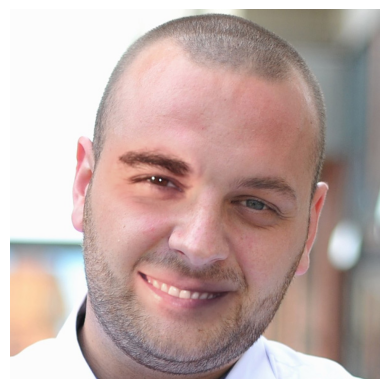

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The image is predicted to be FAKE with confidence: 0.63


In [ ]:
# Check for any image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

IMG_SIZE = 128

# Load the pre-trained model
model = load_model('fake_image_detector.h5')

# Preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Display the uploaded image
def display_image(img_path):
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Predict if the image is real or fake
def predict_image(img_path):
    img = preprocess_image(img_path)
    display_image(img_path)
    prediction = model.predict(img)[0][0]

    if prediction < 0.5:
        print(f"The image is predicted to be REAL with confidence: {1 - prediction:.2f}")
    else:
        print(f"The image is predicted to be FAKE with confidence: {prediction:.2f}")


uploaded = files.upload()
for img_name in uploaded.keys():
    predict_image(img_name)


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 613ms/step - accuracy: 0.5528 - loss: 1.3182
Validation Accuracy: 52.70%
